In [9]:
import cantera as ct
import sys
import os
import csv

gas = ct.Solution('LiDryer.yaml')
gas.TP = 1001.0, ct.one_atm
gas.set_equivalence_ratio(1,"H2","O2:1, N2:3.76")
r = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r])
sim.verbose = True

# limit advance when temperature difference is exceeded
delta_T_max = 20.
r.set_advance_limit('temperature', delta_T_max)

dt_max = 1.e-5
t_end = 100 * dt_max
states = ct.SolutionArray(gas, extra=['t'])
time = []

print('{:10s} {:10s} {:10s} {:14s}'.format(
    't [s]', 'T [K]', 'P [Pa]', 'u [J/kg]'))
while sim.time < t_end:
    sim.advance(sim.time + dt_max)
    states.append(r.thermo.state, t=sim.time*1e3)
    time.append(sim.time*1e3)
    print('{:10.3e} {:10.3f} {:10.3f} {:14.6f}'.format(
            sim.time, r.T, r.thermo.P, r.thermo.u))

Initializing reactor network.
Reactor 0: 11 variables.
              0 sensitivity params.
Number of equations: 11
Maximum time step:                0
t [s]      T [K]      P [Pa]     u [J/kg]      
 1.000e-05   1001.000 101325.000  627729.037756
 2.000e-05   1001.000 101325.000  627729.037334
 3.000e-05   1001.000 101325.000  627729.035564
 4.000e-05   1001.000 101325.000  627729.030951
 5.000e-05   1001.000 101325.000  627729.020340
 6.000e-05   1001.000 101325.000  627728.997077
 7.000e-05   1001.000 101325.000  627728.947117
 8.000e-05   1001.001 101325.000  627728.840804
 9.000e-05   1001.001 101325.000  627728.615444
 1.000e-04   1001.003 101325.000  627728.138141
 1.100e-04   1001.005 101325.000  627727.125684
 1.200e-04   1001.012 101325.000  627724.967729
 1.300e-04   1001.025 101325.000  627720.318786
 1.400e-04   1001.054 101325.000  627710.078787
 1.500e-04   1001.121 101325.000  627686.511834
 1.600e-04   1001.286 101325.000  627627.715416
 1.700e-04   1001.746 101325.000 

<IPython.core.display.Javascript object>


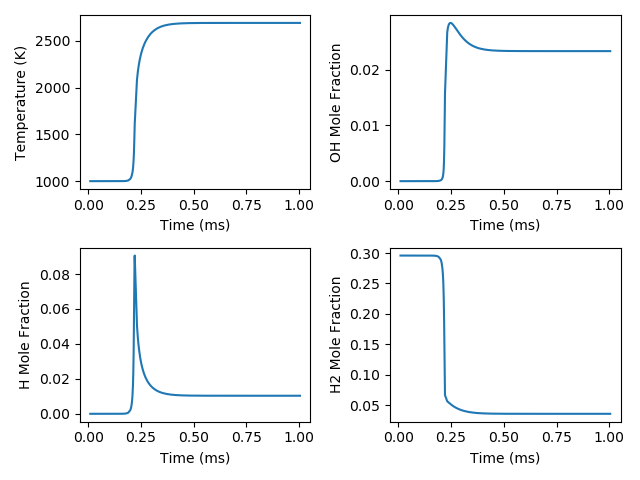

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:, gas.species_index('OH')])
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:, gas.species_index('H')])
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:, gas.species_index('H2')])
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()
plt.show()

In [11]:
import numpy as np
T = np.asmatrix(states.T).T
X = states.X
time = np.asmatrix(time)
time = time.T
ct_data = np.hstack((time,X,T))
print(ct_data)
print(ct_data.shape)

[[1.00000000e-02 2.95857988e-01 1.47928994e-01 ... 1.97803523e-13
  5.56213018e-01 1.00100000e+03]
 [2.00000000e-02 2.95857987e-01 1.47928993e-01 ... 1.06140117e-12
  5.56213018e-01 1.00100000e+03]
 [3.00000000e-02 2.95857985e-01 1.47928992e-01 ... 3.31953807e-12
  5.56213018e-01 1.00100001e+03]
 ...
 [9.84687500e-01 3.56072860e-02 1.26109044e-02 ... 3.45190607e-07
  6.31019254e-01 2.69191003e+03]
 [9.94687500e-01 3.56072856e-02 1.26109043e-02 ... 3.45190596e-07
  6.31019254e-01 2.69191003e+03]
 [1.00468750e+00 3.56072853e-02 1.26109042e-02 ... 3.45190587e-07
  6.31019255e-01 2.69191004e+03]]
(171, 11)


In [12]:
np.savetxt("ct_data.dat",ct_data)

In [8]:
for i, specie in enumerate(gas.species()):
    print(str(i) + '. ' + str(specie))

0. <Species H2>
1. <Species O2>
2. <Species O>
3. <Species OH>
4. <Species H2O>
5. <Species H>
6. <Species HO2>
7. <Species H2O2>
8. <Species N2>
